In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
train_path = "../data/raw/train.csv"
train_demographic_path = "../data/raw/train_demographics.csv"

df = pd.read_csv(train_path)
demographics_df = pd.read_csv(train_demographic_path)

In [3]:
for col_name in df.select_dtypes(include="object").columns:
    print(f"---result for {col_name} ---")
    print(df[col_name].value_counts())
    print()

---result for row_id ---
row_id
SEQ_065531_000052    1
SEQ_065531_000013    1
SEQ_065531_000014    1
SEQ_065531_000015    1
SEQ_065531_000016    1
                    ..
SEQ_000007_000004    1
SEQ_000007_000005    1
SEQ_000007_000006    1
SEQ_000007_000007    1
SEQ_000007_000008    1
Name: count, Length: 574945, dtype: int64

---result for sequence_type ---
sequence_type
Target        344058
Non-Target    230887
Name: count, dtype: int64

---result for sequence_id ---
sequence_id
SEQ_015261    700
SEQ_014205    671
SEQ_028188    647
SEQ_060593    630
SEQ_016031    567
             ... 
SEQ_022667     34
SEQ_032114     34
SEQ_011271     34
SEQ_059162     34
SEQ_009199     29
Name: count, Length: 8151, dtype: int64

---result for subject ---
subject
SUBJ_040733    10848
SUBJ_052342    10393
SUBJ_023739     9154
SUBJ_059520     8947
SUBJ_058967     8718
               ...  
SUBJ_032233     6027
SUBJ_040310     5925
SUBJ_045235     5866
SUBJ_036405     4310
SUBJ_053217     4008
Name: count

In [4]:
subj_set = set(df["subject"].unique())
demographics_subj_set = set(demographics_df["subject"].unique())

demographics_subj_set - subj_set

set()

In [5]:
full_df = pd.merge(
    left=df,
    right=demographics_df,
    on="subject",
    how="left",
)

full_df

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v61,tof_5_v62,tof_5_v63,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,0,12,1,1,163.0,52,24.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,0,12,1,1,163.0,52,24.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,-1.0,0,12,1,1,163.0,52,24.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,-1.0,0,12,1,1,163.0,52,24.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,-1.0,0,12,1,1,163.0,52,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574940,SEQ_065531_000048,Non-Target,SEQ_065531,48,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.503906,...,-1.0,-1.0,71.0,1,30,0,1,186.0,55,30.0
574941,SEQ_065531_000049,Non-Target,SEQ_065531,49,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.773438,...,-1.0,-1.0,-1.0,1,30,0,1,186.0,55,30.0
574942,SEQ_065531_000050,Non-Target,SEQ_065531,50,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.082031,...,-1.0,-1.0,-1.0,1,30,0,1,186.0,55,30.0
574943,SEQ_065531_000051,Non-Target,SEQ_065531,51,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.964844,...,-1.0,-1.0,-1.0,1,30,0,1,186.0,55,30.0


In [6]:
null_sum = full_df.isnull().sum()
null_sum[null_sum > 0]

rot_w         3692
rot_x         3692
rot_y         3692
rot_z         3692
thm_1         6987
             ...  
tof_5_v59    30142
tof_5_v60    30142
tof_5_v61    30142
tof_5_v62    30142
tof_5_v63    30142
Length: 329, dtype: int64

In [7]:
missing_df = full_df.isnull().astype(int)
missing_df = missing_df.loc[:, (missing_df.sum() > 0)]

missing_corr = missing_df.corr()

plt.figure(figsize=(40, 40))
sns.heatmap(missing_corr, cmap="viridis")
plt.show()

In [8]:
# proof: gestures are unrelated to missingess
gestures = full_df.groupby('gesture').apply(lambda x: x.isnull().mean())
gestures.loc[:, gestures.max(axis=0) >= 0.1]

/tmp/ipykernel_7558/3283855186.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gestures = full_df.groupby('gesture').apply(lambda x: x.isnull().mean())


""
gesture
Above ear - pull hair
Cheek - pinch skin
Drink from bottle/cup
Eyebrow - pull hair
Eyelash - pull hair
Feel around in tray and pull out an object
Forehead - pull hairline
Forehead - scratch
Glasses on/off


/tmp/ipykernel_7558/2085585963.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  subjects = full_df.groupby("subject").apply(lambda x: x.isnull().mean())


<Axes: ylabel='subject'>

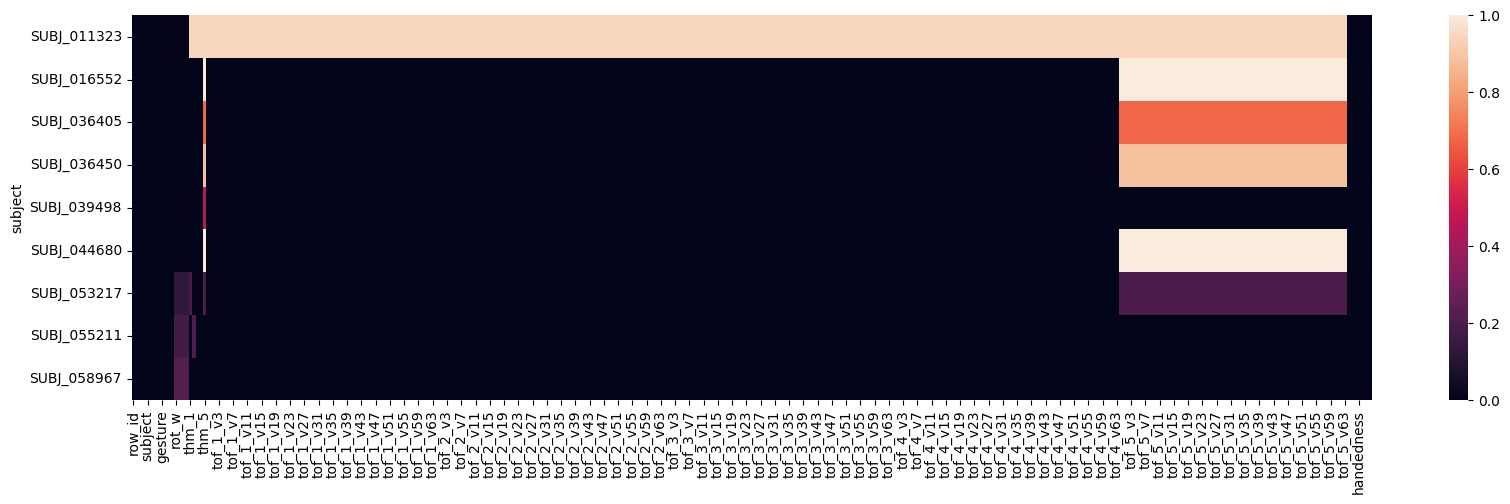

In [9]:
subjects = full_df.groupby("subject").apply(lambda x: x.isnull().mean())

plt.figure(figsize=(20, 5))
sns.heatmap(subjects.loc[subjects.max(axis=1) >= 0.1, :])

Text(0, 0.5, 'percentage of issue')

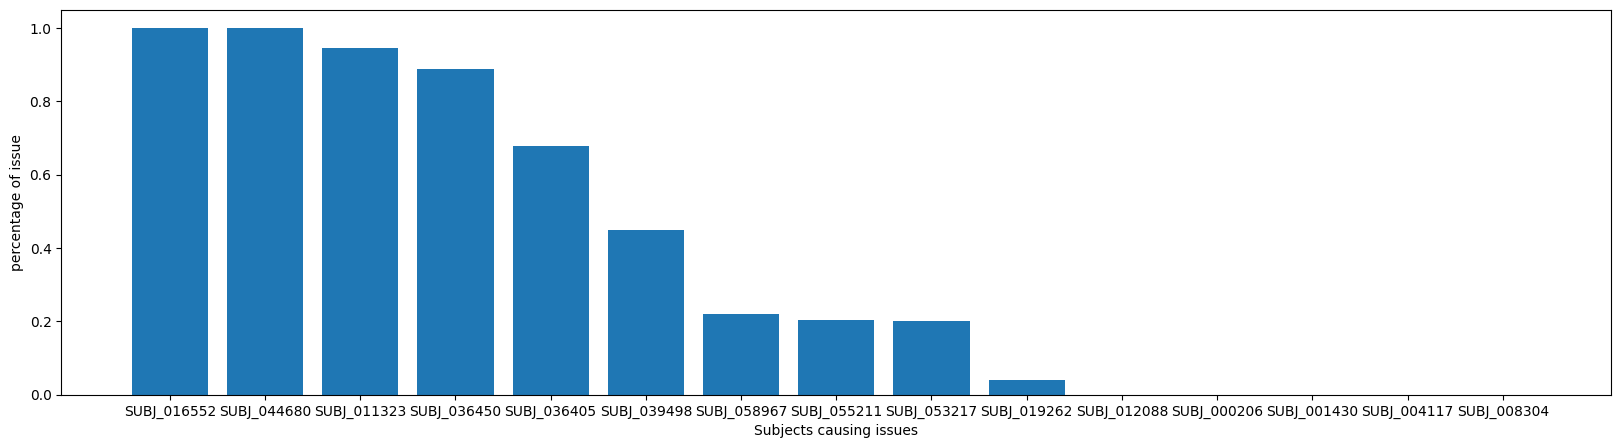

In [10]:
# who are the most dumb subjects
filtered_subjects = subjects.max(axis=1).sort_values(ascending=False)[:15]
plt.figure(figsize=(20, 5))
plt.bar(filtered_subjects.index, filtered_subjects)
plt.xlabel("Subjects causing issues")
plt.ylabel("percentage of issue")

In [11]:
# how much is missing?
print(full_df.isnull().max(axis=1).sum())
print(len(full_df))

38640
574945


Study revelead:
    <br>
    missingness of data and its percentage
        <br>
    we got 3 sensor groups, 2 sensors and one for the rotations, they all shut down together
        <br>
    there are few subjects who are causing this issue, but it's unrelated to the gesture

In [12]:
description = full_df.describe()
description

,sequence_counter,acc_x,acc_y,acc_z,rot_w,rot_x,rot_y,rot_z,thm_1,thm_2,...,tof_5_v61,tof_5_v62,tof_5_v63,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm
count,574945.000000,574945.000000,574945.000000,574945.000000,571253.000000,571253.000000,571253.000000,571253.000000,567958.000000,567307.000000,...,544803.000000,544803.000000,544803.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000,574945.000000
mean,43.645234,1.639980,1.790704,-0.459811,0.360375,-0.119916,-0.059953,-0.188298,27.076450,27.133483,...,31.934330,29.024752,27.320358,0.504544,21.630276,0.600247,0.875898,167.647967,51.502566,25.418165
std,45.717673,5.781259,5.003945,6.096490,0.225739,0.465520,0.543028,0.504137,3.231948,2.941438,...,60.440645,57.218513,55.407192,0.499980,10.343351,0.489848,0.329699,10.740996,4.900248,2.964853
min,0.000000,-34.585938,-24.402344,-42.855469,0.000000,-0.999146,-0.999695,-0.998169,-0.370413,21.958820,...,-1.000000,-1.000000,-1.000000,0.000000,10.000000,0.000000,0.000000,135.000000,41.000000,18.000000
25%,17.000000,-2.964844,-2.121094,-5.417969,0.180237,-0.456299,-0.511536,-0.627686,24.753527,24.543737,...,-1.000000,-1.000000,-1.000000,0.000000,13.000000,0.000000,1.000000,163.000000,49.000000,24.000000
50%,35.000000,2.972656,0.695312,-1.562500,0.340332,-0.186890,-0.112610,-0.263916,26.982324,26.354338,...,-1.000000,-1.000000,-1.000000,1.000000,20.000000,1.000000,1.000000,170.000000,52.000000,25.000000
75%,54.000000,6.343750,6.816406,5.164062,0.503479,0.204590,0.440063,0.251099,29.425036,29.620147,...,42.000000,35.000000,31.000000,1.000000,27.000000,1.000000,1.000000,174.000000,55.000000,27.000000
max,699.000000,46.328125,27.183594,30.078125,0.999390,0.999817,0.999451,0.999878,38.457664,37.578339,...,249.000000,249.000000,249.000000,1.000000,53.000000,1.000000,1.000000,190.500000,71.000000,44.000000


Text(0, 0.5, 'Acceleration')

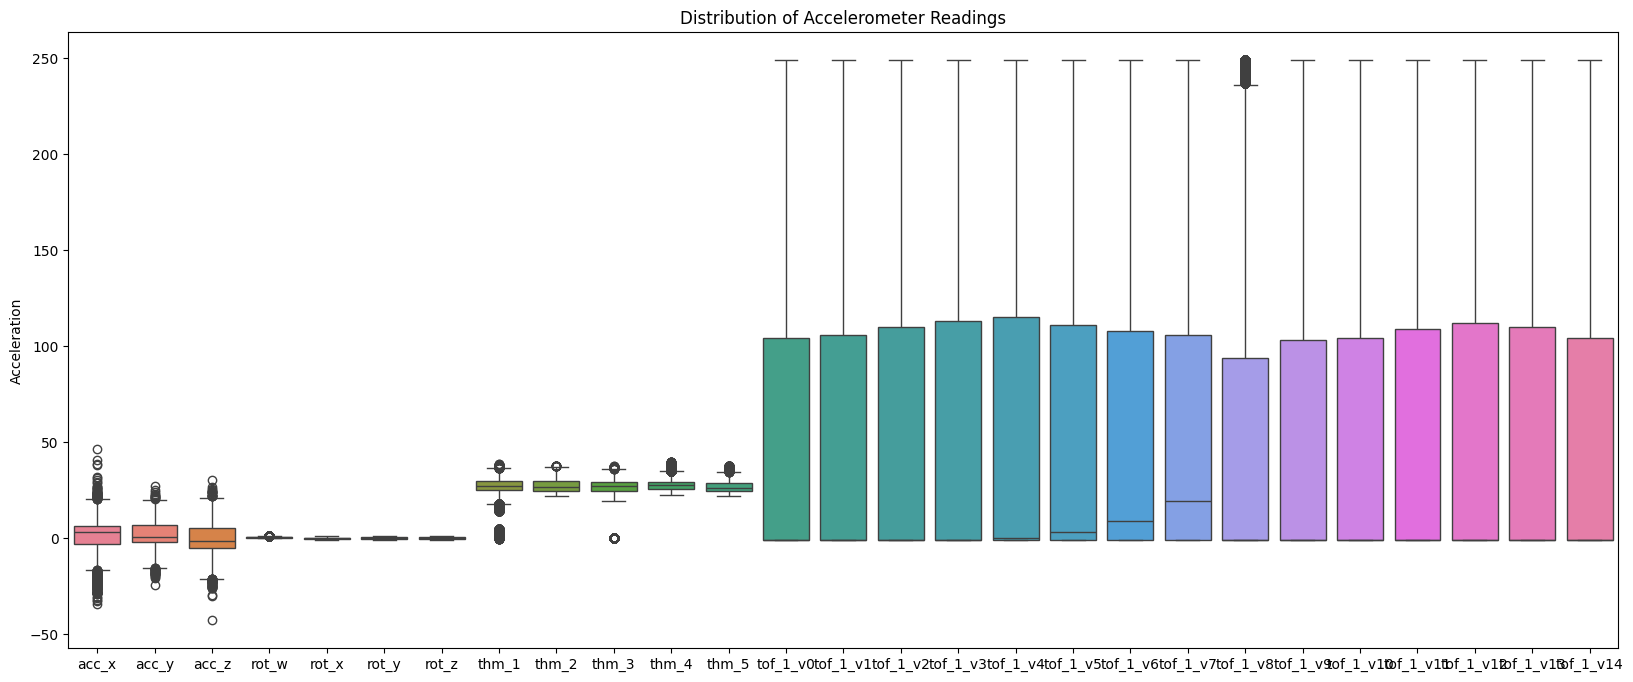

In [13]:
acc_df = full_df[description.columns[1:28]]
plt.figure(figsize=(20, 8))

sns.boxplot(acc_df)

plt.title("Distribution of Accelerometer Readings")
plt.ylabel("Acceleration")

In [14]:
(full_df['tof_1_v11'].isnull()).mean()

np.float64(0.010825383297532808)

<Axes: xlabel='tof_2_v57', ylabel='Count'>

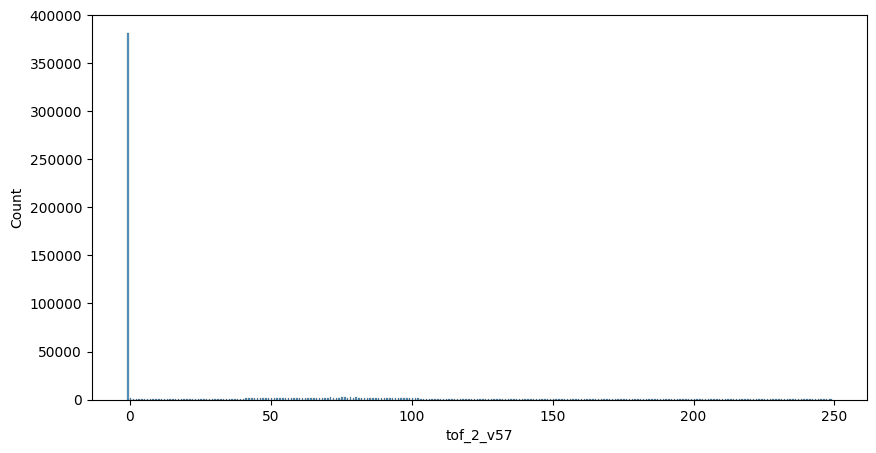

In [15]:
plt.figure(figsize=(10, 5))
n = 57
sns.histplot(full_df[f'tof_2_v{n}'], bins=500)
# plt.ylim(0, 7000)

In [16]:
seq_of_interest = full_df
seq_of_interest['sequence_id'].unique()

array(['SEQ_000007', 'SEQ_000008', 'SEQ_000013', ..., 'SEQ_065522',
       'SEQ_065526', 'SEQ_065531'], dtype=object)

In [21]:
full_df['gesture'].unique()

array(['Cheek - pinch skin', 'Forehead - pull hairline',
       'Write name on leg', 'Feel around in tray and pull out an object',
       'Neck - scratch', 'Neck - pinch skin', 'Eyelash - pull hair',
       'Eyebrow - pull hair', 'Forehead - scratch',
       'Above ear - pull hair', 'Wave hello', 'Write name in air',
       'Text on phone', 'Pull air toward your face',
       'Pinch knee/leg skin', 'Scratch knee/leg skin',
       'Drink from bottle/cup', 'Glasses on/off'], dtype=object)

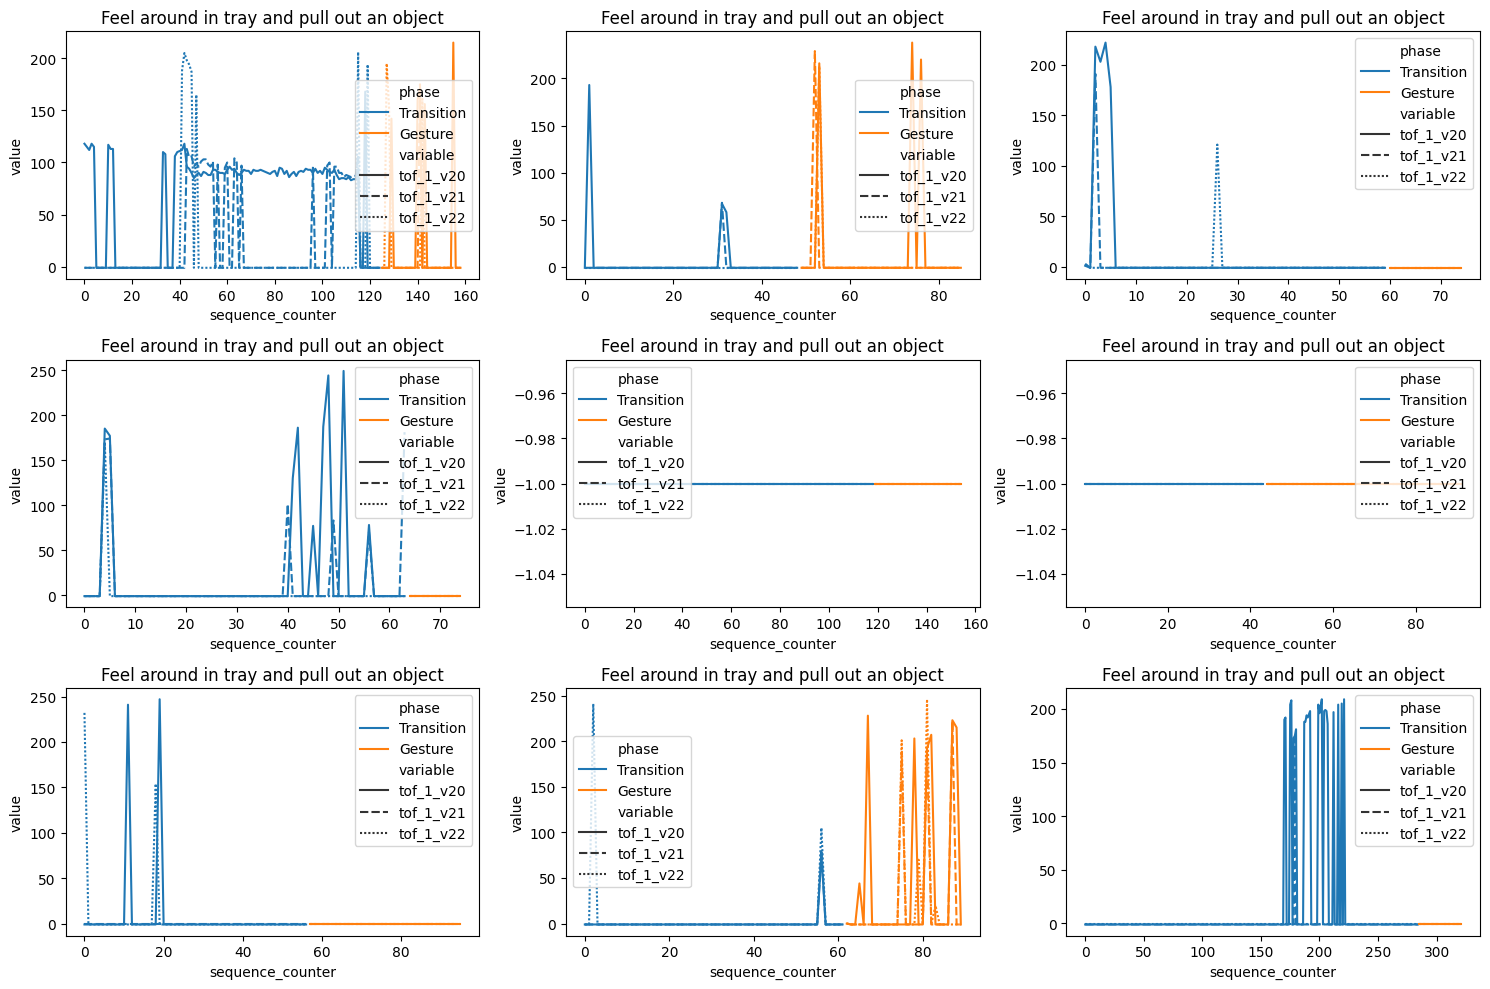

In [37]:
target_gesture = full_df["gesture"].unique()[3]
# target_gesture = "Wave hello"
# cols_of_interest = ["acc_x", "acc_y", "acc_z"]
# cols_of_interest = ["thm_1", "thm_2", "thm_3"]
# cols_of_interest = ["rot_x", "rot_y", "rot_z", "rot_w"]
# cols_of_interest = ["tof_1_v20", "tof_1_v21",  "tof_1_v22"]
# cols_of_interest = ["tof_2_v20", "tof_2_v21",  "tof_2_v22"]

filtered = full_df[full_df["gesture"] == target_gesture]
sequences = filtered["sequence_id"].unique()

plt.figure(figsize=(15, 10))

i = 1
m = 3
n = 3
for seq_id in sequences:
    seq_of_interest = full_df[full_df["sequence_id"] == seq_id]
    gesture_title = seq_of_interest["gesture"].unique()[0]

    plt.subplot(m, n, i)

    melted = pd.melt(
        frame=seq_of_interest,
        id_vars=["sequence_counter", "phase"],
        value_vars=cols_of_interest,
    )

    sns.lineplot(
        melted,
        x="sequence_counter",
        y="value",
        hue="phase",
        style="variable",
    )

    plt.title(gesture_title)

    i += 1
    if i == m * n + 1:
        break
    
plt.tight_layout()

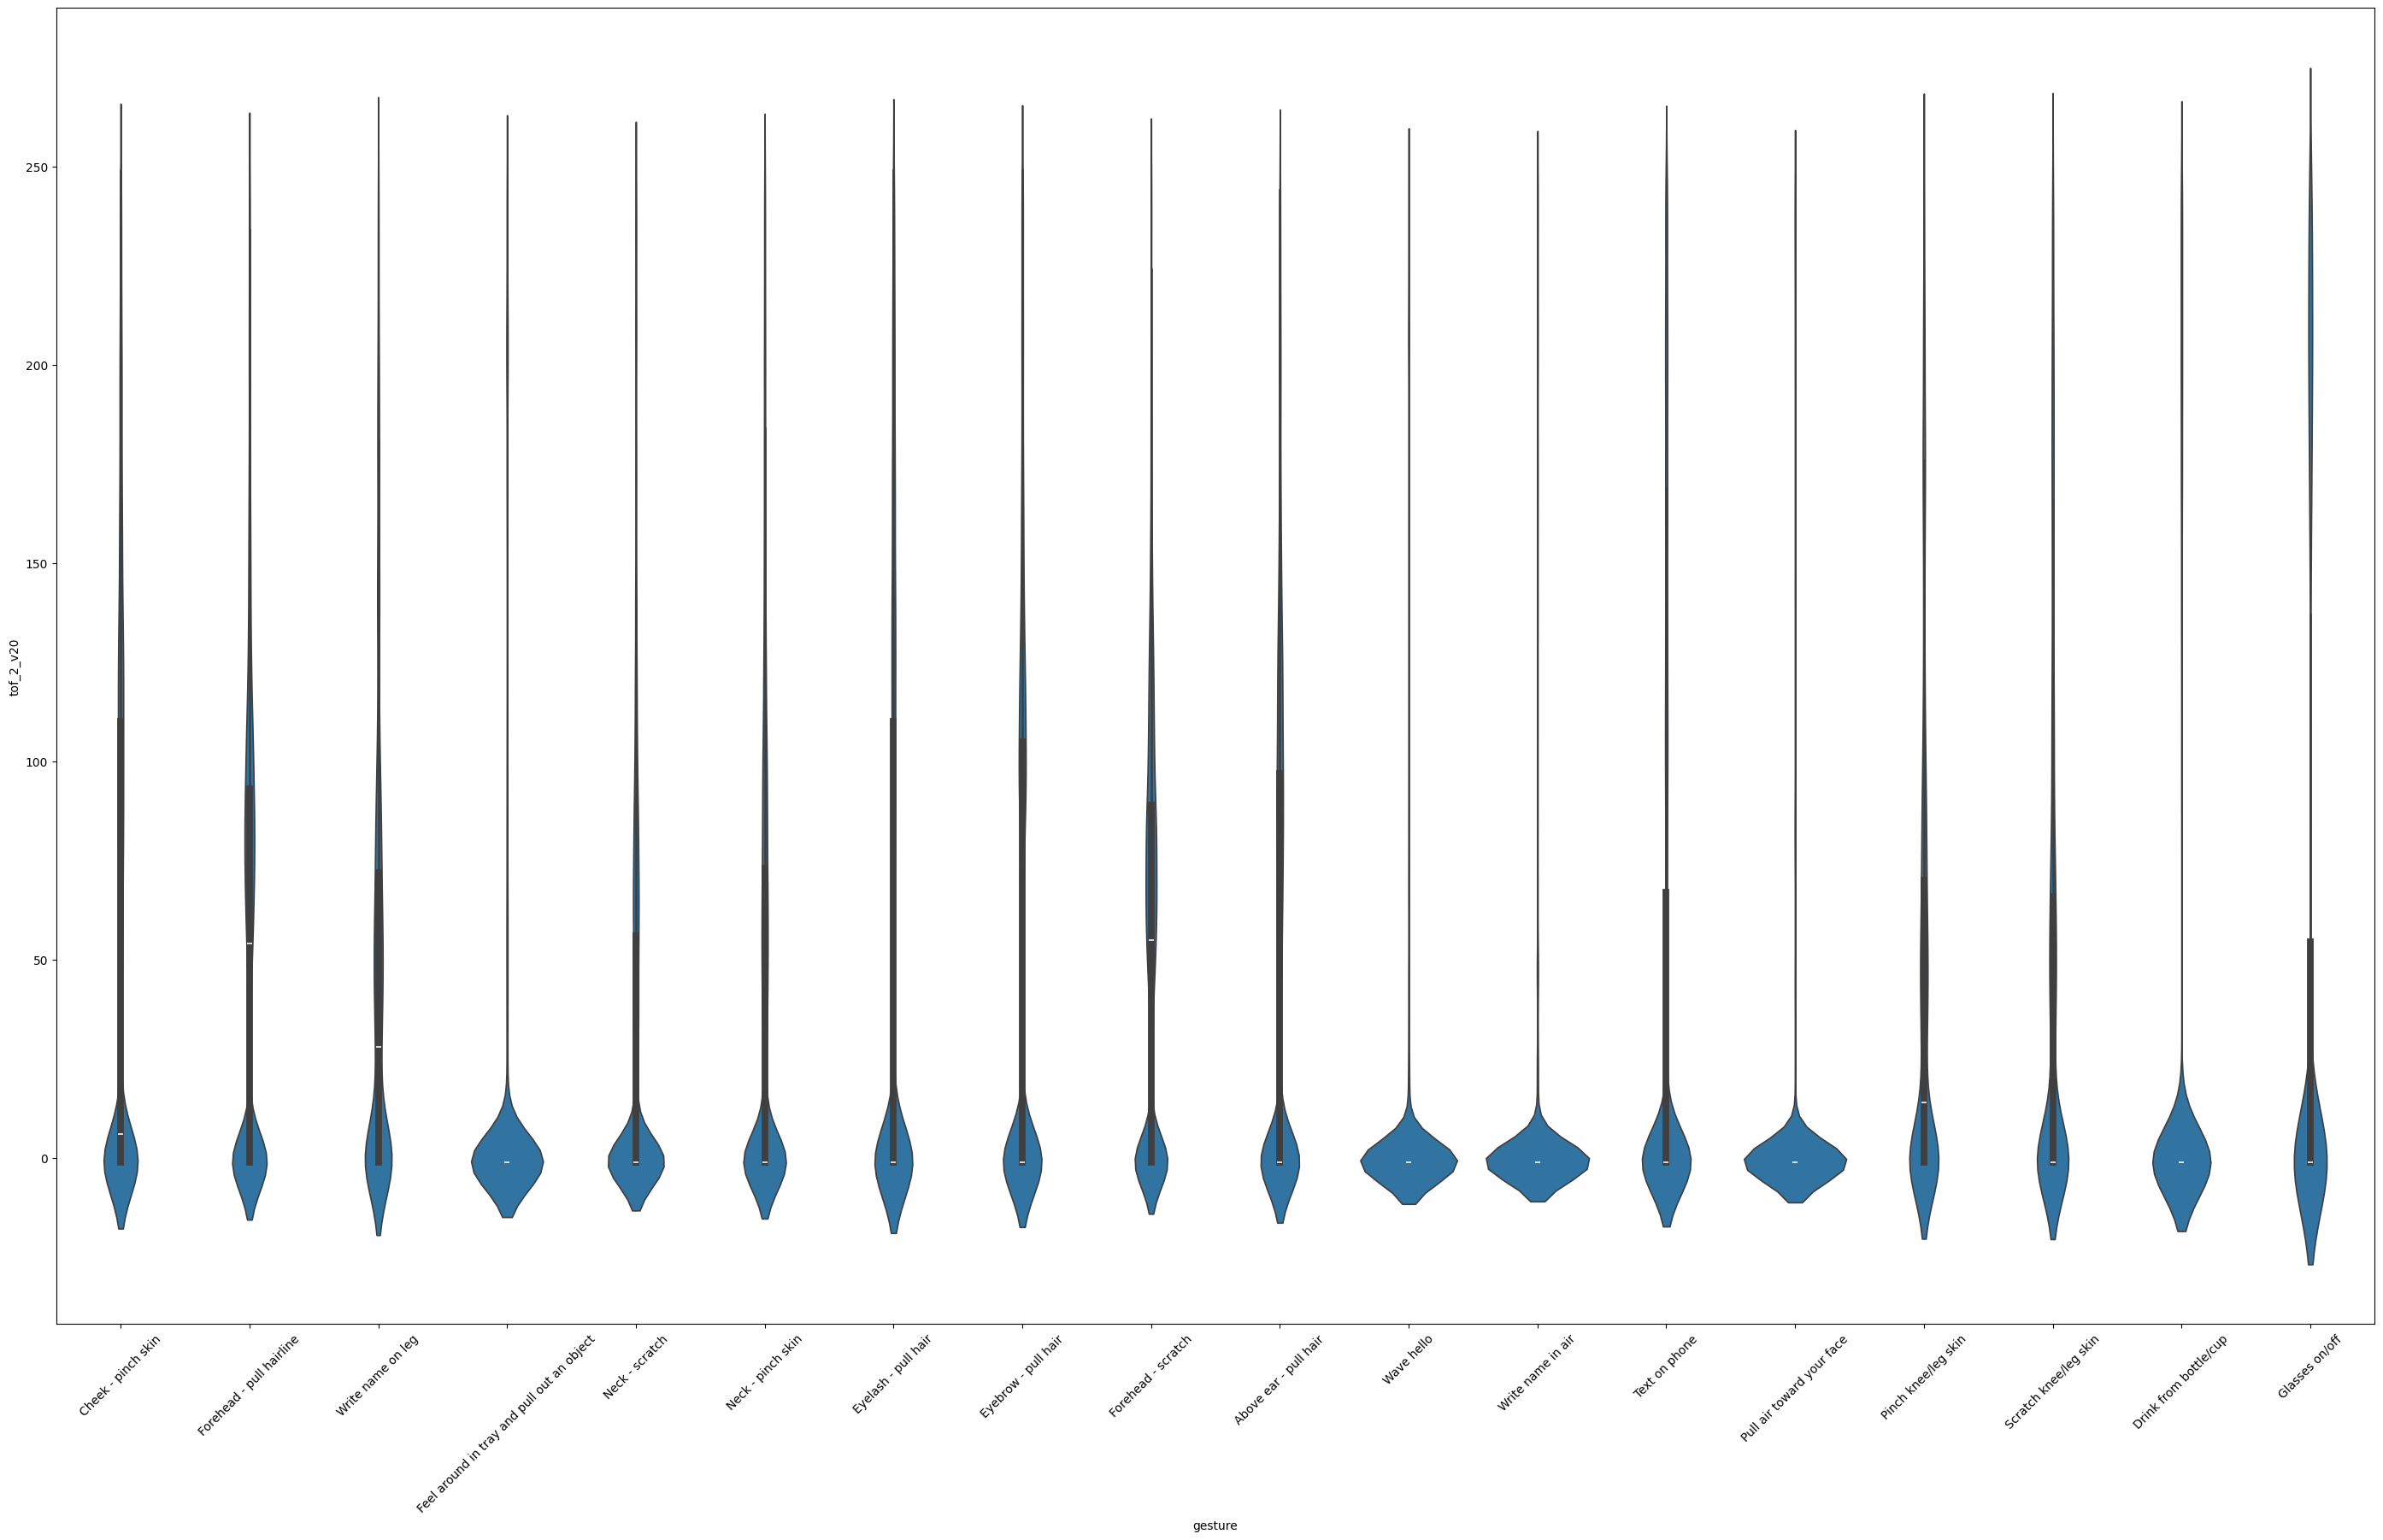

In [38]:
plt.figure(figsize=(35, 20))
sns.violinplot(full_df, x="gesture", y="tof_2_v20")
plt.xticks(rotation=45)
plt.show()